In [1]:
# packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('Data_with_Coordinates_index.csv')

df.shape

(1092, 10)

In [13]:
df.head()

,id,Fournisseurs,n_facture,Montant,Date_de_facture,Date_echeance,n_sem,Mis_en_paie,EMAIL,id_fournisseurs
0,1,Capsule Corp,115968610,74.00,2021-03-29,2021-04-12,15,2021-12-26 19:33:52,contact@capsule-corp.fr,1
1,2,Cyberdyne,21040827,1008.00,2021-04-09,2021-04-12,15,2021-12-26 19:34:04,contact@cyberdyne.fr,2
2,3,Geugène Industrie,2103006,2842.94,2021-03-15,2021-04-14,15,2021-12-26 19:34:05,contact@geugene.fr,3
3,4,Luthor Corp,F1920074,1325.00,2021-01-15,2021-04-15,15,2021-12-26 19:34:15,contact@luther.fr,4
4,5,Luthor Corp,F1920110,444.00,2021-01-15,2021-04-15,15,2021-12-26 19:34:16,contact@luther.fr,4


In [14]:
res = df.groupby( "n_sem" ).agg( 
    Montant_total = ('Montant','sum'),
    min_montant = ('Montant', 'min'), 
    max_montant = ('Montant', 'max'),
    nbre_factures = ('id', 'count')).reset_index()


res.head()

,n_sem,Montant_total,min_montant,max_montant,nbre_factures
0,1,501489.00,-355.00,171029.0,26
1,2,912750.60,30.00,191906.0,24
2,3,919171.20,20.00,198074.0,30
3,4,3635.11,5.11,837.0,21
4,5,126130.60,47.00,99195.0,15


In [16]:
data = res[ (res["n_sem"]>7) & (res["n_sem"]<23) ] 
data

,n_sem,Montant_total,min_montant,max_montant,nbre_factures
7,8,543613.84,35.0,208130.00,15
8,9,676898.11,180.0,183076.00,13
9,10,214533.00,22.0,116969.00,16
10,15,346029.94,74.0,321781.00,21
11,16,348875.01,260.0,322043.02,14
12,17,732764.35,18.0,210958.00,27
13,18,350854.36,-57.0,132727.00,19
14,19,299996.33,245.0,287761.00,10
15,20,626352.50,-20.0,322651.00,34
16,21,418611.86,60.0,180061.00,36


In [26]:
data['nbre_factures'].min(), data['nbre_factures'].max()

(10, 36)

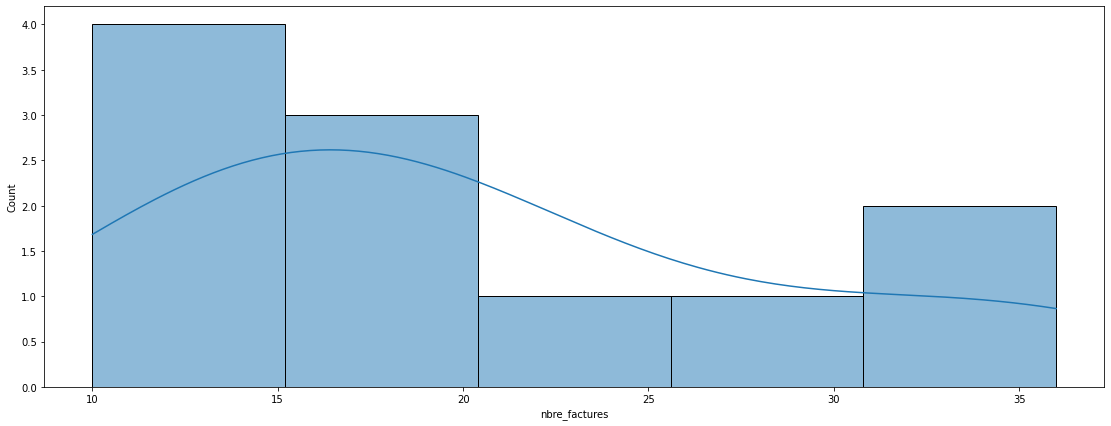

In [31]:
plt.figure(figsize = (19, 7))
sns.histplot(data.loc[:100, 'nbre_factures'], kde = True, bins = 5); # kde : density estimation

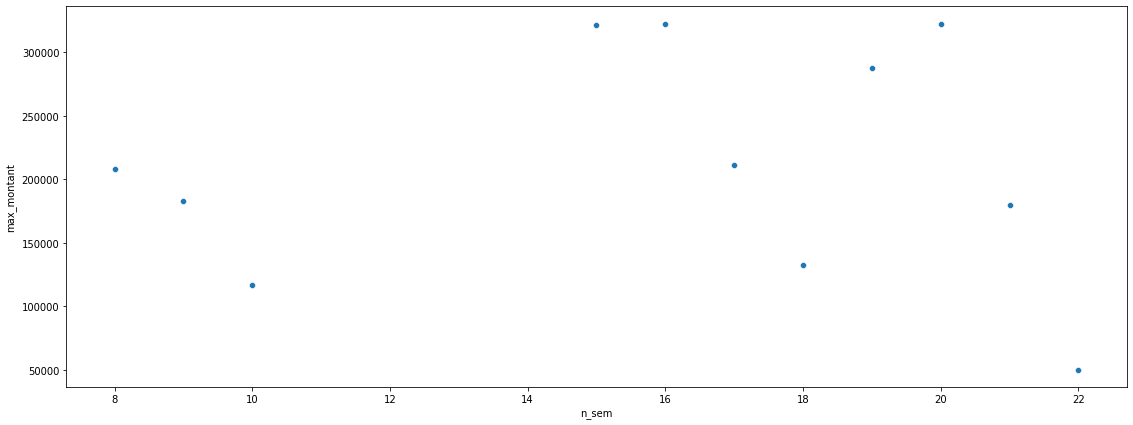

In [33]:
plt.figure(figsize = (19, 7))
sns.scatterplot(x="n_sem", y="max_montant", data=data);

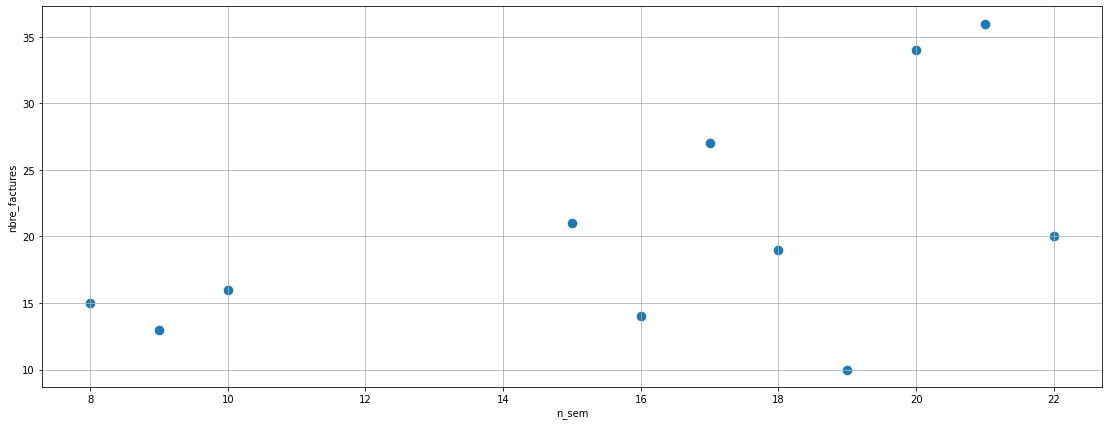

In [48]:
plt.figure(figsize = (19, 7))
sns.scatterplot(x="n_sem", y="nbre_factures",
                s = 111, 
               data=data)
plt.grid(True)